In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
# import inflect
from word2number import w2n
import pickle
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv("./Data/CarPrice_Assignment.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# a) Null Values and Duplicated Rows

In [6]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data.duplicated().sum()

0

# Data Skewness

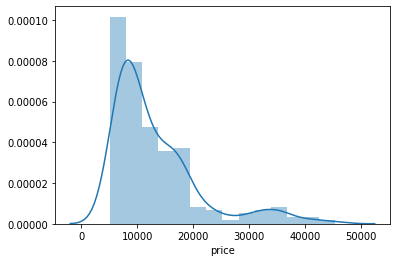

In [8]:
sns.distplot(data.price)

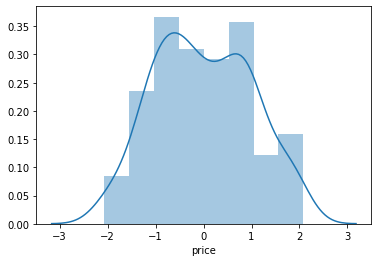

In [9]:
p = PowerTransformer(method = 'box-cox')

data['price'] = p.fit_transform(data[['price']])
sns.distplot(data['price'])

In [10]:
skew_feats=data.drop('price', axis=1).skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
skewness=skewness[abs(skewness)>0.5].dropna()
skewness

,Skew
compressionratio,2.610862
enginesize,1.947655
horsepower,1.405310
wheelbase,1.050214
carwidth,0.904003
curbweight,0.681398
citympg,0.663704
highwaympg,0.539997
stroke,-0.689705


In [11]:
skewed_columns = skewness.index

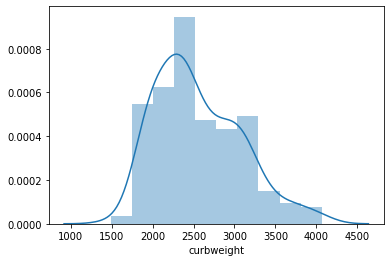

In [12]:
sns.distplot(data['curbweight'])

In [13]:
for skew_col in skewed_columns:
    data[skew_col] = p.fit_transform(data[[skew_col]])

In [14]:
skew_feats=data.drop('price', axis=1).skew().sort_values(ascending=False)
skew_feats

symboling           0.211072
carlength           0.155954
stroke              0.120019
peakrpm             0.075159
carheight           0.063123
horsepower          0.048363
curbweight          0.024852
boreratio           0.020156
compressionratio    0.008026
citympg             0.000188
car_ID              0.000000
highwaympg         -0.000576
enginesize         -0.003189
wheelbase          -0.004320
carwidth           -0.044453
dtype: float64

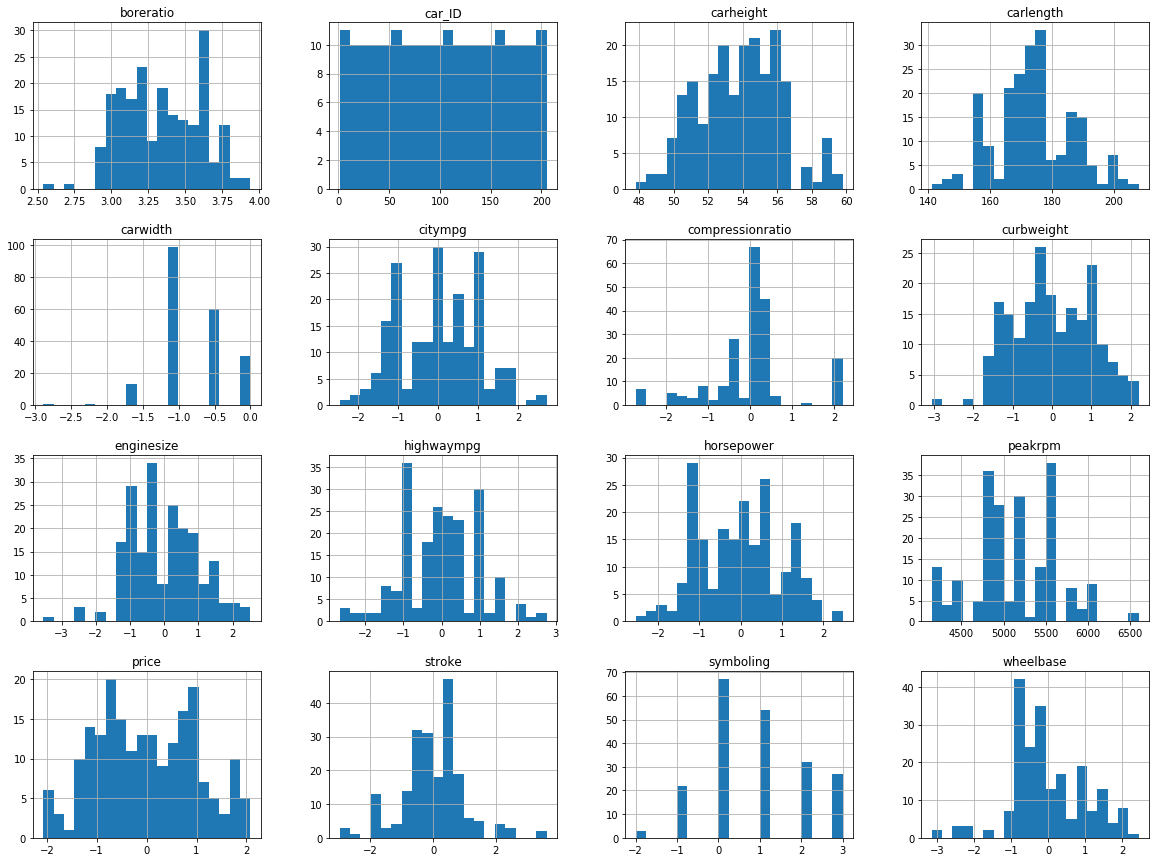

In [192]:
data.hist(bins=20, figsize=(20,15))
plt.show()

# using Correlation matrix to select features

In [15]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending = False)

price               1.000000
curbweight          0.904334
horsepower          0.842976
enginesize          0.805647
carlength           0.791501
carwidth            0.735371
boreratio           0.623688
wheelbase           0.602960
carheight           0.181206
stroke              0.136119
car_ID              0.001227
compressionratio   -0.079384
peakrpm            -0.088311
symboling          -0.091310
highwaympg         -0.811842
citympg            -0.822651
Name: price, dtype: float64

In [16]:
data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.181267,0.170636,0.045366,0.255960,0.128719,0.075766,0.260064,-0.162917,0.166777,-0.007259,-0.203789,0.055875,0.036574,0.001227
symboling,-0.151621,1.000000,-0.549021,-0.357612,-0.218582,-0.541038,-0.208911,-0.153433,-0.130051,-0.001056,-0.139231,0.038178,0.273606,-0.053759,0.031003,-0.091310
wheelbase,0.181267,-0.549021,1.000000,0.868576,0.730473,0.601140,0.735048,0.569500,0.473144,0.195189,0.066482,0.424014,-0.351400,-0.463297,-0.539958,0.602960
carlength,0.170636,-0.357612,0.868576,1.000000,0.790854,0.491029,0.890801,0.746616,0.606454,0.160474,0.003085,0.636445,-0.287242,-0.672845,-0.715931,0.791501
carwidth,0.045366,-0.218582,0.730473,0.790854,1.000000,0.252523,0.779819,0.644734,0.495492,0.252788,0.028278,0.602230,-0.172223,-0.627971,-0.661795,0.735371
carheight,0.255960,-0.541038,0.601140,0.491029,0.252523,1.000000,0.302142,0.166484,0.171071,-0.058296,0.215693,-0.052589,-0.320411,-0.023123,-0.099876,0.181206
curbweight,0.128719,-0.208911,0.735048,0.890801,0.779819,0.302142,1.000000,0.858954,0.678763,0.189386,-0.078993,0.802012,-0.250522,-0.811405,-0.837857,0.904334
enginesize,0.075766,-0.153433,0.569500,0.746616,0.644734,0.166484,0.858954,1.000000,0.653964,0.258749,-0.114436,0.788087,-0.298548,-0.694274,-0.705002,0.805647
boreratio,0.260064,-0.130051,0.473144,0.606454,0.495492,0.171071,0.678763,0.653964,1.000000,-0.027948,-0.098288,0.619403,-0.254976,-0.578101,-0.580881,0.623688
stroke,-0.162917,-0.001056,0.195189,0.160474,0.252788,-0.058296,0.189386,0.258749,-0.027948,1.000000,-0.063805,0.143402,-0.094188,-0.072040,-0.080624,0.136119


In [17]:
corr_matrix = data.corr()
corr_feats = corr_matrix['price'].sort_values(ascending = False)
correlation=pd.DataFrame({'Corr':corr_feats})
correlation=correlation[correlation>0.6].dropna()
# correlation = correlation.drop('price')

In [18]:
correlation

,Corr
price,1.000000
curbweight,0.904334
horsepower,0.842976
enginesize,0.805647
carlength,0.791501
carwidth,0.735371
boreratio,0.623688
wheelbase,0.602960


In [19]:
pos_corr_cols = correlation.index 
pos_corr_cols = pos_corr_cols.drop(['carwidth', 'carlength'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002401E868388>,
      dtype=object)

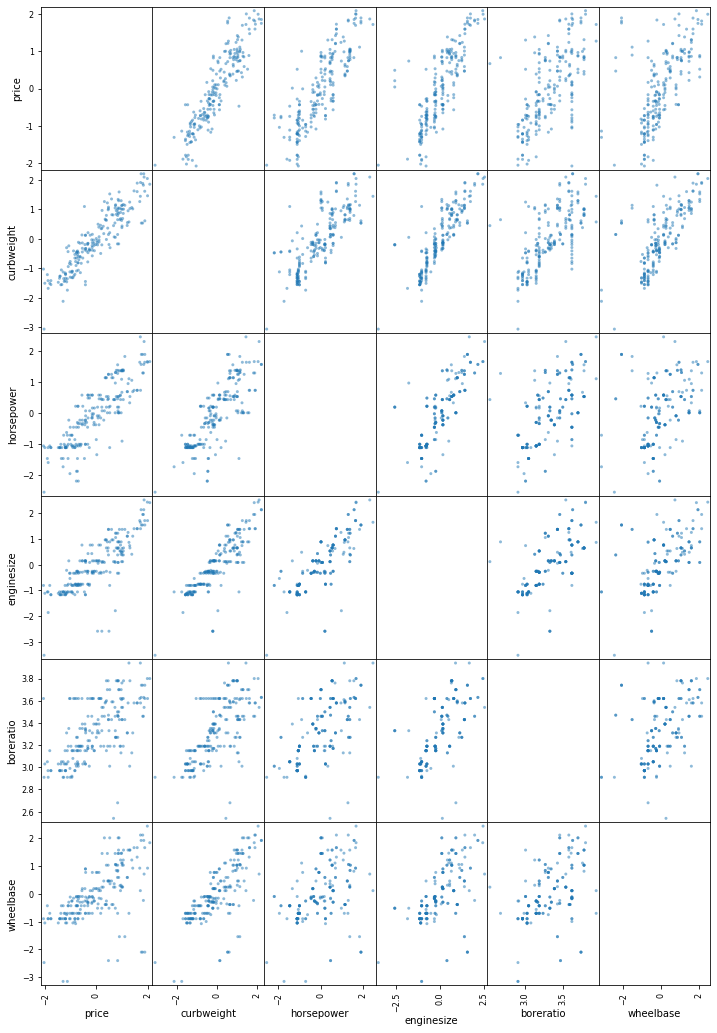

In [20]:
# pos_corr_cols = correlation.index 
scatter_matrix(data[pos_corr_cols], figsize=(12,18), diagonal='scatter')

# b) Feature Encoding (One-hot & Label Encoding)

In [199]:
np.unique(np.array(data['fuelsystem']) ) 
# one hot encoding: feultype, aspiration, engine_location
# label ecoding: carbody, enginetype, fuel system
# custom label encoding: doornumber, cylindernumber

array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)

## 1. One Hot Encoding for " FuelType" and "Aspiration"

In [200]:
encoded_data = pd.get_dummies(data, columns = ['fueltype', 'aspiration', 'enginelocation'])

In [201]:
encoded_data

,car_ID,symboling,CarName,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear
0,1,3,alfa-romero giulia,two,convertible,rwd,-2.403020,168.8,-1.15564,48.8,...,5000,-0.585903,-0.487064,0.468026,0,1,1,0,1,0
1,2,3,alfa-romero stelvio,two,convertible,rwd,-2.403020,168.8,-1.15564,48.8,...,5000,-0.585903,-0.487064,0.826801,0,1,1,0,1,0
2,3,1,alfa-romero Quadrifoglio,two,hatchback,rwd,-0.699775,171.2,-1.15564,52.4,...,5000,-0.976694,-0.652136,0.826801,0,1,1,0,1,0
3,4,2,audi 100 ls,four,sedan,fwd,0.365053,176.6,-0.57782,54.3,...,5500,-0.064805,-0.020144,0.530367,0,1,1,0,1,0
4,5,2,audi 100ls,four,sedan,4wd,0.296326,176.6,-0.57782,54.3,...,5500,-1.187887,-1.369271,0.918898,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),four,sedan,rwd,1.579404,188.8,0.00000,55.5,...,5400,-0.230854,-0.326912,0.861224,0,1,1,0,1,0
201,202,-1,volvo 144ea,four,sedan,rwd,1.579404,188.8,0.00000,55.5,...,5300,-0.976694,-0.822480,1.056467,0,1,0,1,1,0
202,203,-1,volvo 244dl,four,sedan,rwd,1.579404,188.8,0.00000,55.5,...,5500,-1.187887,-1.180584,1.234104,0,1,1,0,1,0
203,204,-1,volvo 246,four,sedan,rwd,1.579404,188.8,0.00000,55.5,...,4800,0.247395,-0.487064,1.296801,1,0,0,1,1,0


#  2. Custom Encoder for "no of doors" and "no of cylinders"

In [202]:
# a = np.unique(np.array(hot_encoded_data['cylindernumber']))
# b = np.unique(np.array(hot_encoded_data['doornumber']))
# c= np.concatenate((a.reshape(1, -1), b.reshape(1, -1)), axis=1)
# c = np.unique(c)
# c

# # c2 = np.arange(1, 13)
# # p = inflect.engine()
# nums = np.array([(w2n.word_to_num(n), n) for n in list(c )])
# nums

In [203]:
def num_encoder(x):
    return w2n.word_to_num(x)


encoded_data['doornumber'] = encoded_data['doornumber'].map(lambda x: w2n.word_to_num(x))
encoded_data['cylindernumber'] = encoded_data['cylindernumber'].map(lambda x:w2n.word_to_num(x))

In [204]:
encoded_data['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [205]:
data['cylindernumber']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

In [206]:
with open('./hot_custom_encoded_data.pkl', 'wb') as f:
    pickle.dump(encoded_data, f)

# 3. Label Encoding for other columns

In [207]:
np.unique(np.array(data['carbody']))

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)

In [208]:
lbl_enc = LabelEncoder()

In [209]:
encoded_data['carbody'] = lbl_enc.fit_transform(encoded_data['carbody'])

In [210]:
encoded_data['carbody']

0      0
1      0
2      2
3      3
4      3
      ..
200    3
201    3
202    3
203    3
204    3
Name: carbody, Length: 205, dtype: int32

In [211]:
np.unique(np.array(data['enginetype']))

array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)

In [212]:
encoded_data['enginetype'] = lbl_enc.fit_transform(encoded_data['enginetype'])

encoded_data['enginetype']

0      0
1      0
2      5
3      3
4      3
      ..
200    3
201    3
202    5
203    3
204    3
Name: enginetype, Length: 205, dtype: int32

In [213]:
np.unique(np.array(data['fuelsystem']))

array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)

In [214]:
encoded_data['fuelsystem'] = lbl_enc.fit_transform(encoded_data['fuelsystem'])

encoded_data['fuelsystem']

0      5
1      5
2      5
3      5
4      5
      ..
200    5
201    5
202    5
203    3
204    5
Name: fuelsystem, Length: 205, dtype: int32

# c) Feature Normalization

In [215]:
# Selecting numeric features using info from data dictionary

In [21]:
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
scaler = MinMaxScaler()
for col in numeric_features:
    data[col] = scaler.fit_transform(data[[col]])

# Dummy encoding and post processing (concat)

In [22]:
cat_cols = data.dtypes[data.dtypes == 'object'].index
cat_cols = cat_cols.drop('CarName', 'car_ID')
prepared_data =pd.get_dummies(data, columns =cat_cols)
prepared_data['CarName'] = data['CarName']

In [23]:
prepared_data.drop(columns = ['car_ID'], inplace = True)

In [24]:
with open('./prepared_data.pkl', 'wb') as f:
    pickle.dump(prepared_data, f)

In [25]:
prepared_data.shape

(205, 54)

# d) Encoding and Normalization using Sklearn.Compose

In [319]:
data.drop('car_ID', axis=1,  inplace = True)

KeyError: "['car_ID'] not found in axis"

In [320]:
num_cols = data.dtypes[data.dtypes != 'object'].index
num_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [321]:
cat_cols = data.dtypes[data.dtypes == 'object'].index
cat_cols = cat_cols.drop('CarName')
cat_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [322]:
cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [323]:
oh_encoder = OneHotEncoder(handle_unknown = 'ignore')

pipeline = ColumnTransformer([ ('num', StandardScaler(), num_cols), 
                               ('cat', oh_encoder, cat_cols)

                             ])
pipeline.fit_transform(data)

cat_encoder = pipeline.named_transformers_['cat']
all_cat = []
for cat in cat_encoder.categories_:
    for i in range(0, len(cat)):
        all_cat.append(cat[i])
        
features = list(num_cols) + all_cat
# features = list(num_cols) + list(cat_encoder.categories_)
# features = pipeline.get_feature_names
# features
pp_data = pipeline.transform(data)
pp_data.shape

(205, 53)

In [303]:
pp_data

array([[ 1.74347043, -2.40301982, -0.42652147, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.74347043, -2.40301982, -0.42652147, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.133509  , -0.69977502, -0.23151305, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.47645244,  1.57940478,  1.19854871, ...,  1.        ,
         0.        ,  0.        ],
       [-1.47645244,  1.57940478,  1.19854871, ...,  0.        ,
         0.        ,  0.        ],
       [-1.47645244,  1.57940478,  1.19854871, ...,  1.        ,
         0.        ,  0.        ]])

In [296]:
pp_data

array([[ 1.74347043, -2.40301982, -0.42652147, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.74347043, -2.40301982, -0.42652147, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.133509  , -0.69977502, -0.23151305, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.47645244,  1.57940478,  1.19854871, ...,  1.        ,
         0.        ,  0.        ],
       [-1.47645244,  1.57940478,  1.19854871, ...,  0.        ,
         0.        ,  0.        ],
       [-1.47645244,  1.57940478,  1.19854871, ...,  1.        ,
         0.        ,  0.        ]])

In [325]:
dd = dict()
for i in range(0, len(features)):
    key = features[i]
    value = pp_data[:, i]
    dd[key] = value
    
    

In [326]:
sample = pd.DataFrame(dd)
sample.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'diesel',
       'gas', 'std', 'turbo', 'four', 'two', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front', 'rear',
       'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five',
       'six', 'three', 'twelve', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

In [329]:
sample['carName'] = data['CarName']

In [330]:
with open('./prepared_data2.pkl', 'wb') as f:
    pickle.dump(sample, f)

# e) Graphs

In [303]:
encoded_data[numeric_features] = num_data

In [304]:
encoded_data

,car_ID,symboling,CarName,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear
0,1,3,alfa-romero giulia,2,0,rwd,0.058309,0.413433,0.316667,0.083333,...,0.346939,0.222222,0.289474,13495.0,0,1,1,0,1,0
1,2,3,alfa-romero stelvio,2,0,rwd,0.058309,0.413433,0.316667,0.083333,...,0.346939,0.222222,0.289474,16500.0,0,1,1,0,1,0
2,3,1,alfa-romero Quadrifoglio,2,2,rwd,0.230321,0.449254,0.433333,0.383333,...,0.346939,0.166667,0.263158,16500.0,0,1,1,0,1,0
3,4,2,audi 100 ls,4,3,fwd,0.384840,0.529851,0.491667,0.541667,...,0.551020,0.305556,0.368421,13950.0,0,1,1,0,1,0
4,5,2,audi 100ls,4,3,4wd,0.373178,0.529851,0.508333,0.541667,...,0.551020,0.138889,0.157895,17450.0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,3,rwd,0.655977,0.711940,0.716667,0.641667,...,0.510204,0.277778,0.315789,16845.0,0,1,1,0,1,0
201,202,-1,volvo 144ea,4,3,rwd,0.655977,0.711940,0.708333,0.641667,...,0.469388,0.166667,0.236842,19045.0,0,1,0,1,1,0
202,203,-1,volvo 244dl,4,3,rwd,0.655977,0.711940,0.716667,0.641667,...,0.551020,0.138889,0.184211,21485.0,0,1,1,0,1,0
203,204,-1,volvo 246,4,3,rwd,0.655977,0.711940,0.716667,0.641667,...,0.265306,0.361111,0.289474,22470.0,1,0,0,1,1,0


In [305]:
data[numeric_features] = num_data

In [306]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,0.058309,...,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,0.058309,...,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,0.230321,...,0.343396,mpfi,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,0.384840,...,0.181132,mpfi,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,0.373178,...,0.283019,mpfi,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,0.655977,...,0.301887,mpfi,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,0.655977,...,0.301887,mpfi,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,0.655977,...,0.422642,mpfi,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,0.655977,...,0.316981,idi,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


In [310]:
data['symboling'] = ["risky" if x in([-3, -2, -1]) else "not_risky" for x in list(data['symboling'])]

In [311]:
data['symboling']

0      not_risky
1      not_risky
2      not_risky
3      not_risky
4      not_risky
         ...    
200        risky
201        risky
202        risky
203        risky
204        risky
Name: symboling, Length: 205, dtype: object

In [312]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [323]:
with open('./hot_custom_encoded_data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [314]:
X = data.loc[:, ~data.columns.isin(['car_ID', 'CarName', 'aspiration', 'price'])]

In [319]:
data['price'] = scaler.fit_transform(data[['price']])

In [320]:
y = data['price']

In [321]:
y

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

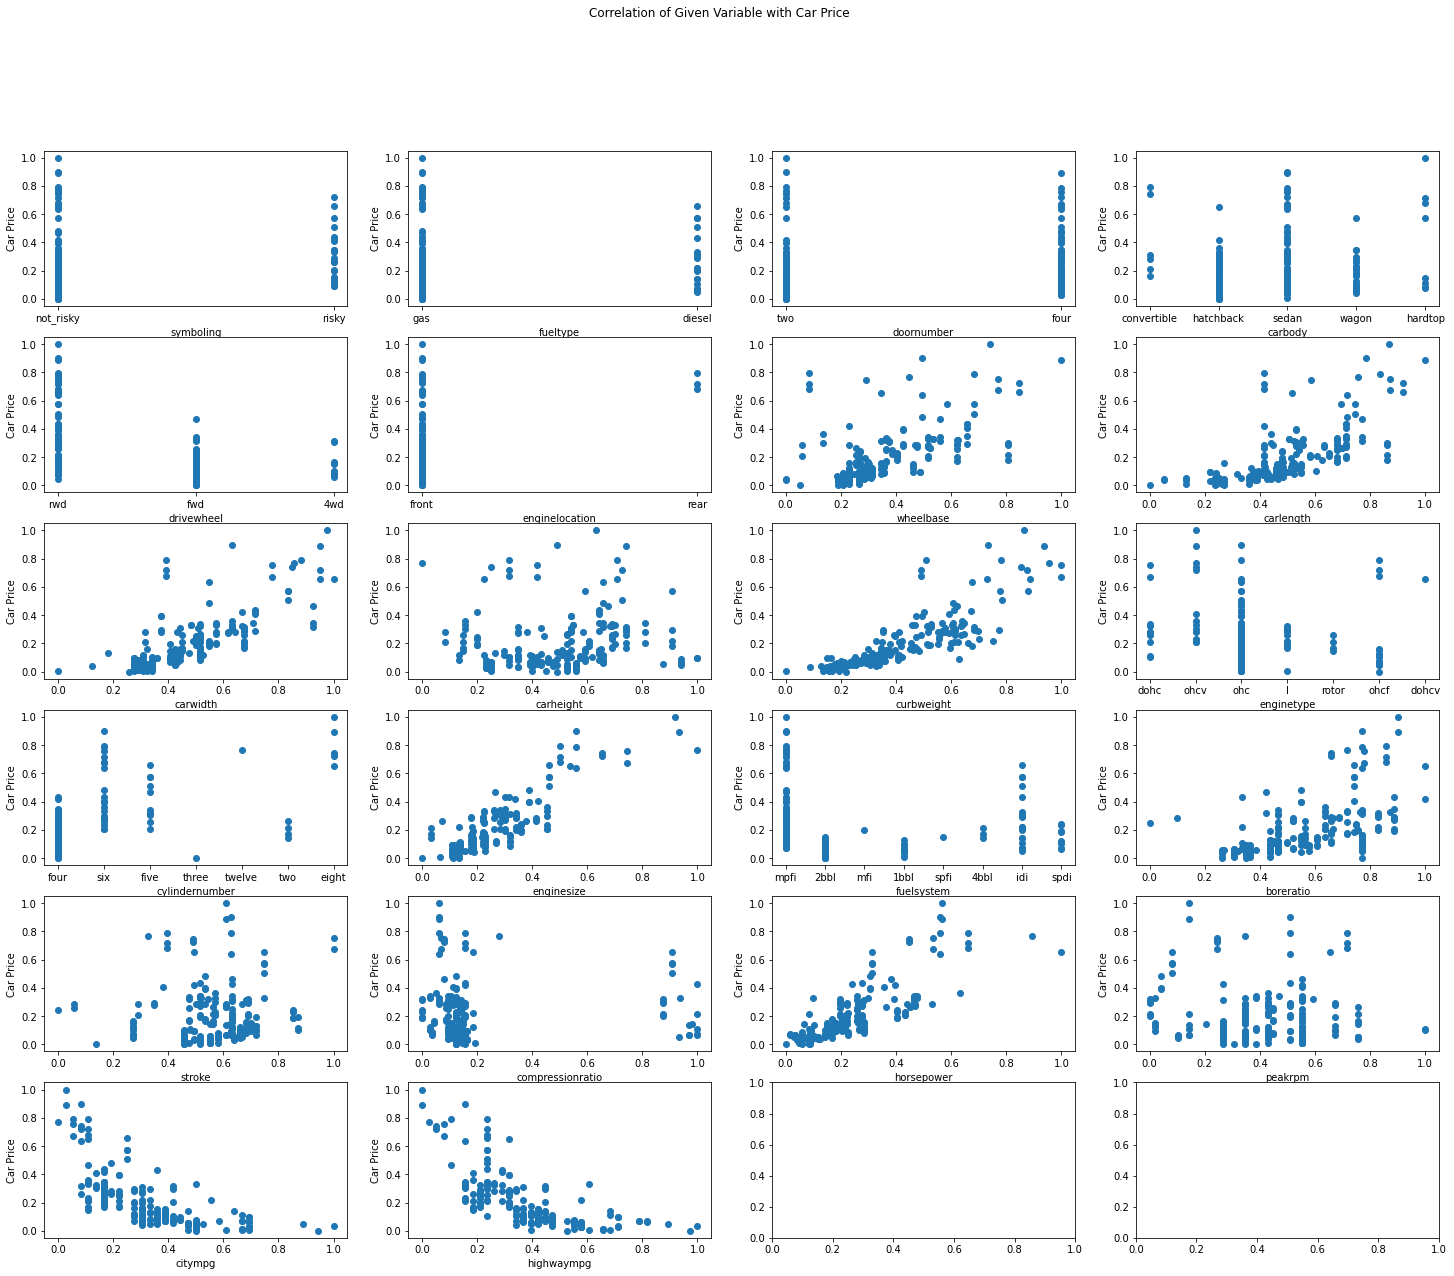

In [347]:
fig, axs = plt.subplots(6, 4, figsize=(25, 20))
fig.suptitle('Correlation of Given Variable with Car Price')
cols = list(X.columns)
s = 0
t =0
for i in range(0, len(cols)):
        if t==4:
            s = s+1
            t= 0
        sub = axs[s, t]
        col = cols[i]
        sub.scatter(X[col], y)
        sub.set_xlabel(str(col))
        sub.set_ylabel("Car Price")
        t = t+1

In [328]:
len(X.columns)

22

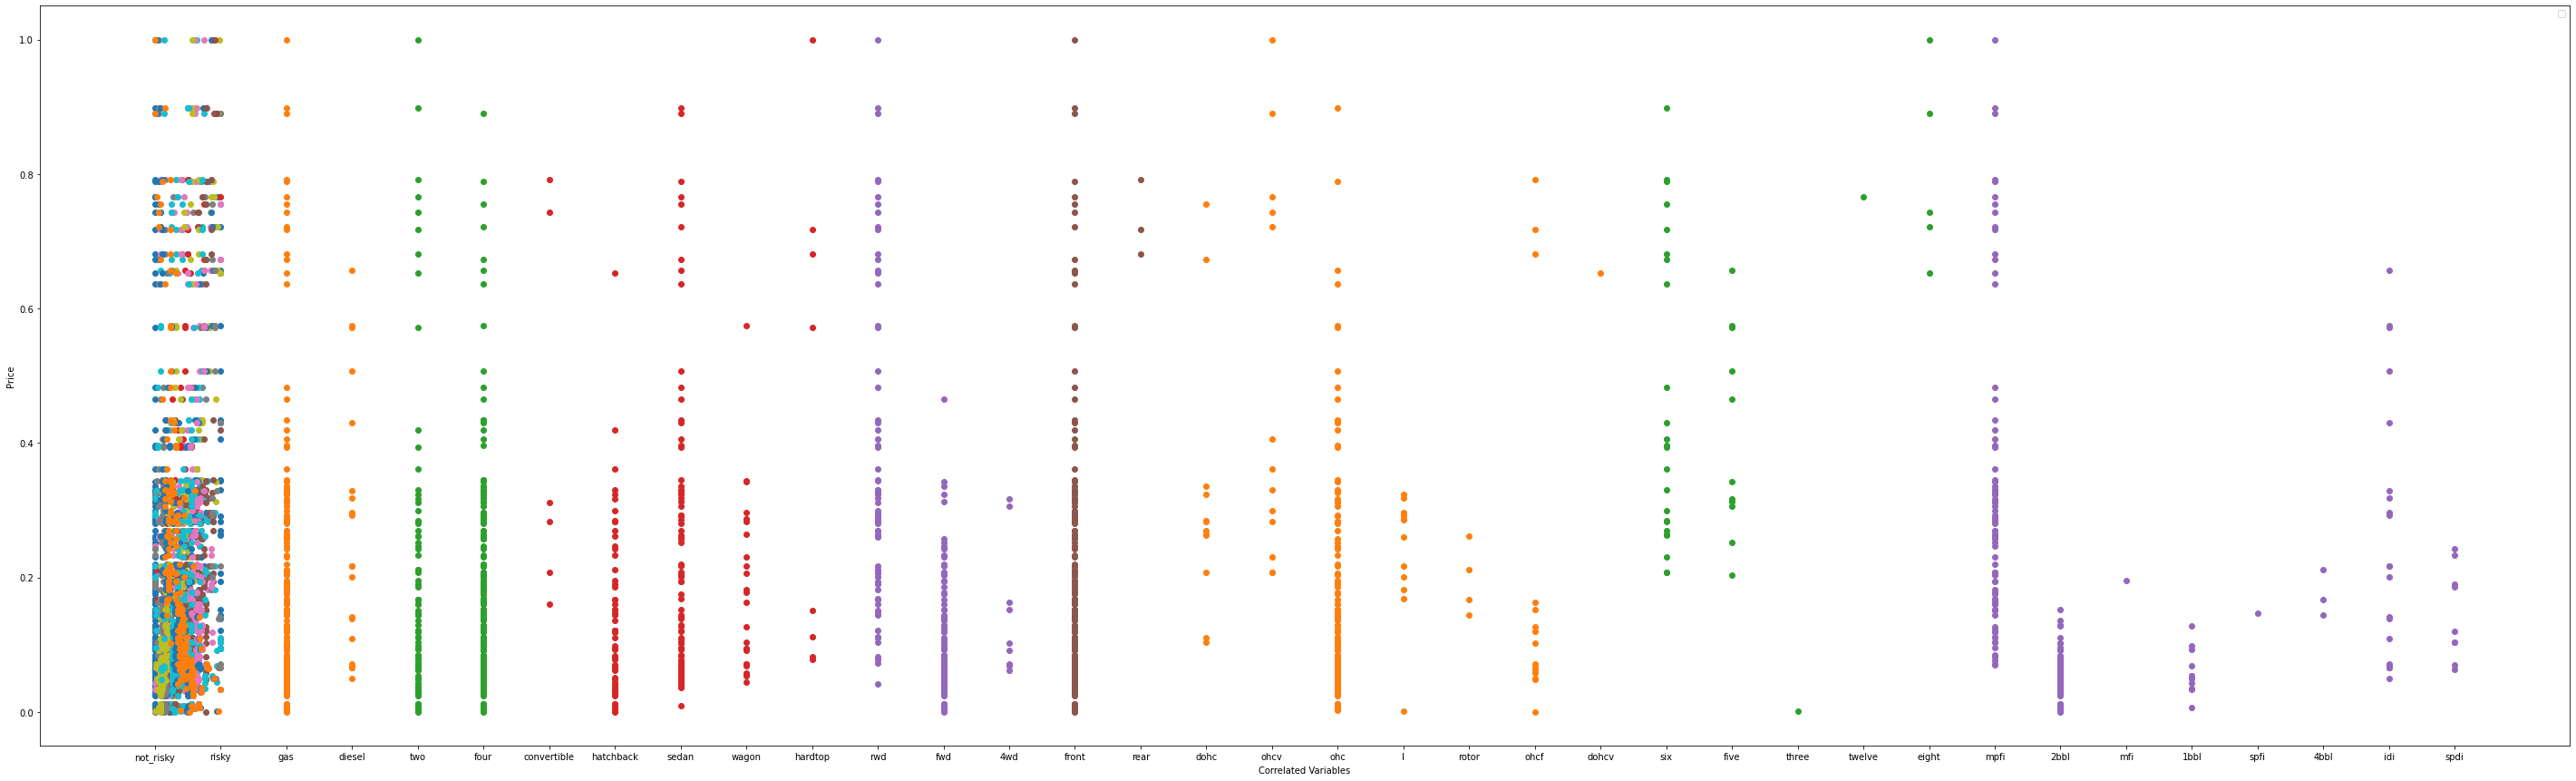

In [332]:
plt.figure(figsize=(50, 15))
plt.ylabel("Price")
plt.xlabel("Correlated Variables")
plt.legend(cols)
cols = list(X.columns)
for col in cols:
    plt.scatter(X[col], y )

Text(0, 0.5, 'Car Price')

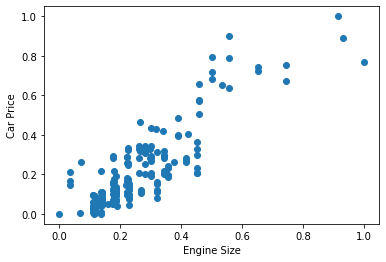

In [339]:
plt.scatter(X['enginesize'], y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")

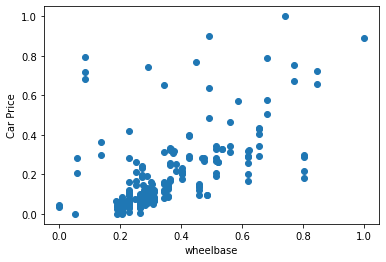

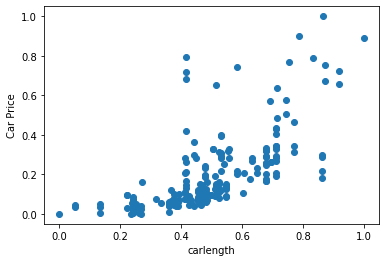

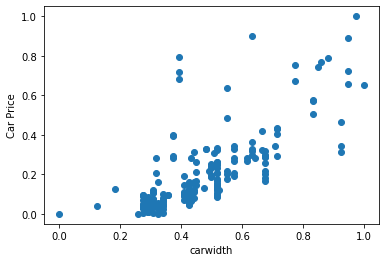

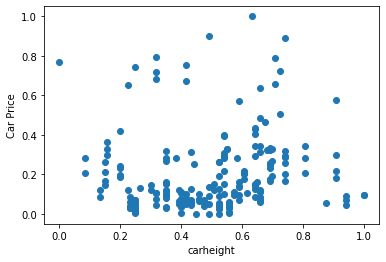

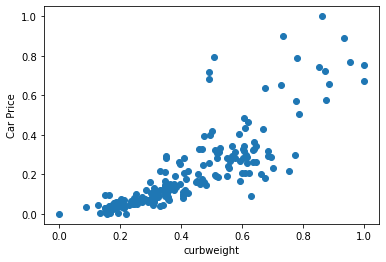

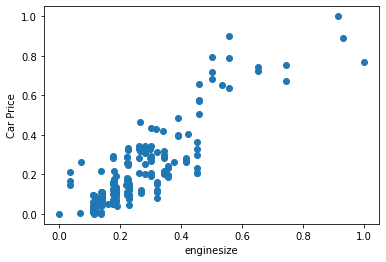

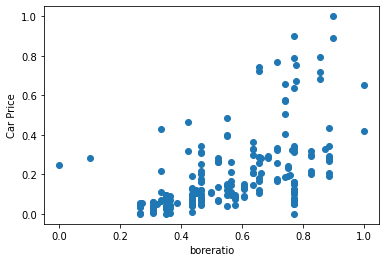

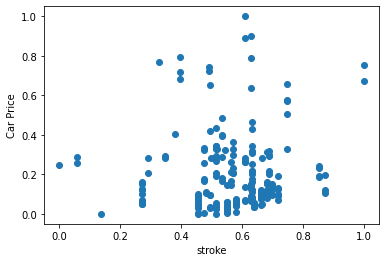

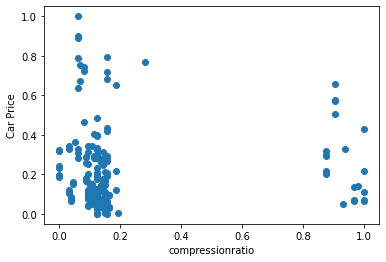

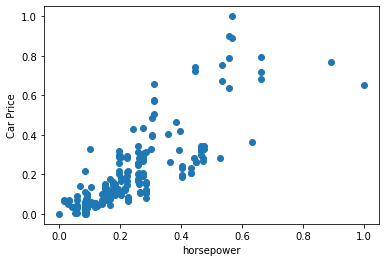

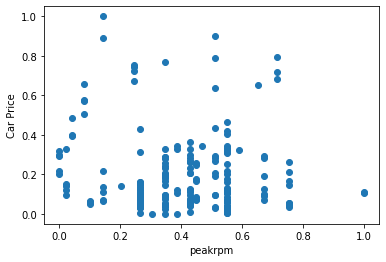

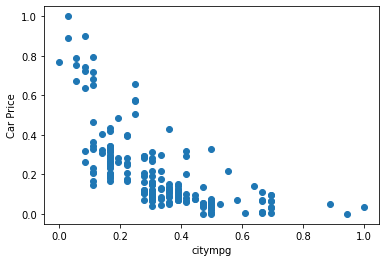

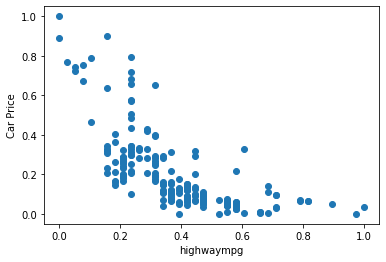

In [342]:
for col in list(num_data.columns):
    plt.figure()
    plt.scatter(num_data[col], y)
    plt.xlabel(str(col))
    plt.ylabel("Car Price")

Text(0, 0.5, 'Car Price')

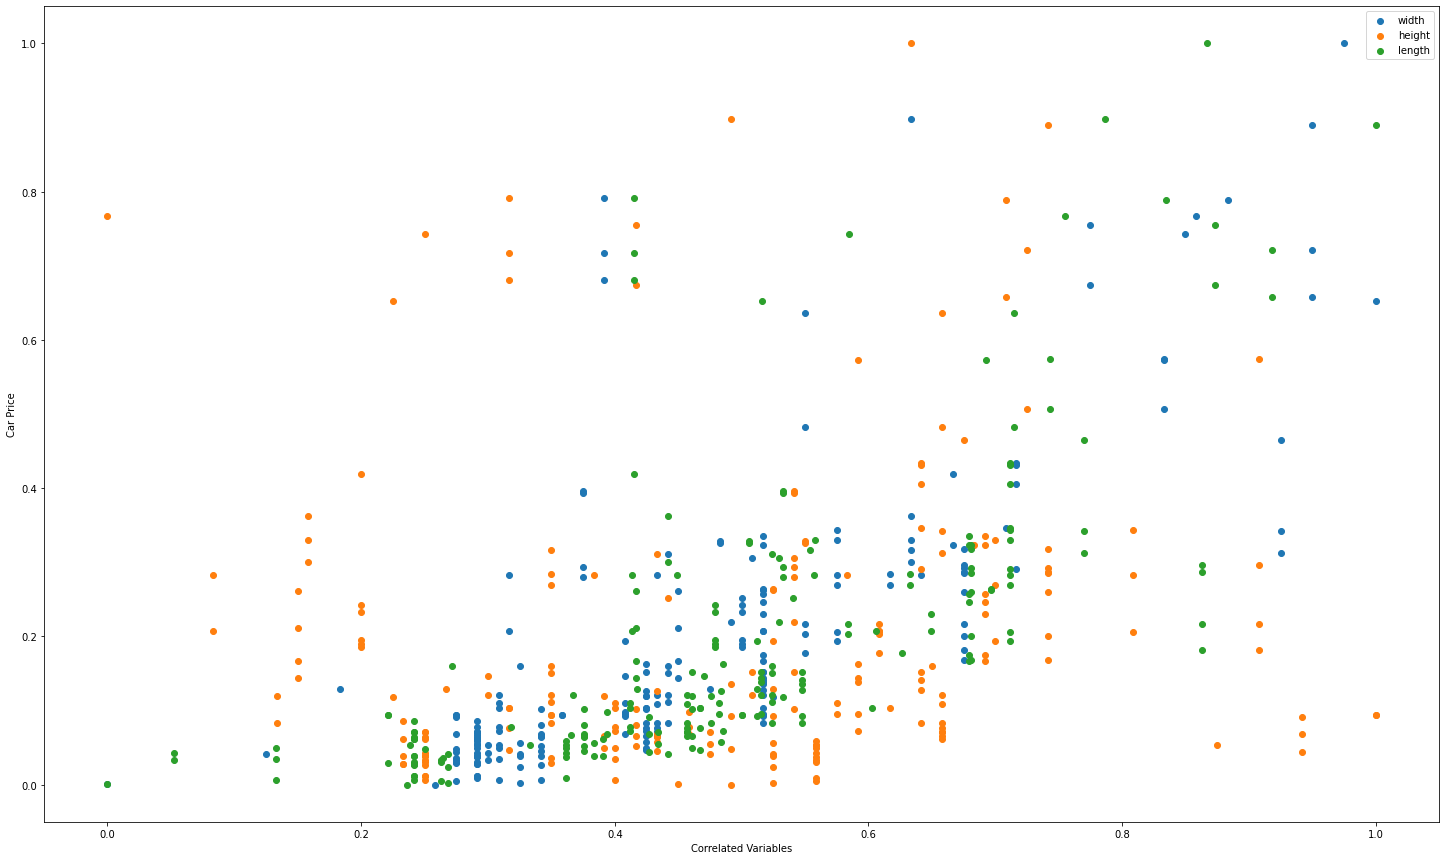

In [359]:
plt.figure(figsize = (25, 15))
leg = ["width", "height", "length"]
plt.scatter(encoded_data['carwidth'],  y)
plt.scatter(encoded_data['carheight'], y)
plt.scatter(encoded_data['carlength'], y)
plt.legend(leg)
plt.xlabel("Correlated Variables")
plt.ylabel("Car Price")